In [1]:
from IPython.display import HTML
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.input').hide()
    } else {
        $('div.input').show()
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Toggle cell visibility <a href="javascript:code_toggle()">here</a>.''')
display(tag)

In [2]:
# Erasmus+ ICCT project (2018-1-SI01-KA203-047081)

%matplotlib notebook
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import signal
import ipywidgets as widgets
import control as c
import sympy as sym
from IPython.display import Latex, display, Markdown # For displaying Markdown and LaTeX code
from fractions import Fraction
import matplotlib.patches as patches

## Sistemi prvega reda brez ničel

### Uvod

Sistemi prvega reda brez ničel so karakterizirani z naslednjo prenosno funkcijo:

\begin{equation}
    G(s)=\frac{k}{s+k}.
\end{equation}

Vrednost $k$ je pomembna, ker vpliva na vrednosti naslednjih parametrov:
- $1/k$ predstavlja *časovno konstanto* odziva sistema, ki določa čas, v katerem prehodna funkcija doseže $\approx$ 63% njene končne vrednosti.
- $t_v$ označuje *čas vzpona*, tj. čas, ki je potreben, da prehodna funkcija pride od 10\% do 90\% njene končne vrednosti.
- $t_p$ označuje *čas trajanja prehodnega pojava*, tj. čas pri katerem je prehodna funkcija zadnjič izven intervala sprejemljivih vrednosti (v tem interaktivnem primeru je ta interval nastavljen na $\pm2\%$ končne vrednosti).

Odziv sistemov prvega reda brez ničel na enotsko skočno funkcijo je določen kot:

\begin{equation}
    c(t)=1-e^{-at},
\end{equation}

kjer je naravni/nevsiljeni/lastni odziv (odziv na začetne pogoje) enak $1$ in vsiljeni odziv (odziv na vzbujanje) $-e^{-at}$.

---

### Kako upravljati s tem interaktivnim primerom?

Z uporabo drsnikov spreminjaj vrednost $k$, ki je del prenosne funkcije sistemov prvega reda $G(s)=\frac{k}{s+k}$, in opazuj odziv sistema na enotsko skočno funkcijo.


<!-- First-order systems without zeros are characterized by the following transfer function:

\begin{equation}
    G(s)=\frac{k}{s+k}.
\end{equation}

The $k$ value is important since it defines the following parameters:
- $1/k$ denotes the *time constant* of the response, which defines the time needed for the step response to reach $\approx$ 63% of its final value.
- $t_r$ denotes the *rise time*, i.e. the time needed for the system response to go from 10\% to 90\% of the steady state value.
- $t_s$ denotes the *settling time*, i.e. the time needed for the system response to be outside the error band (e.g. 2\% as set in the example below) for the last time.

The step response of these systems is given by:

\begin{equation}
    c(t)=1-e^{-at},
\end{equation}

where the forced response is equal to $1$ and natural response to $-e^{-at}$.

---

### How to use this notebook?

Move the slider to define the $k$ value in the transfer function of the first-order system - $G(s)=\frac{k}{s+k}$ and observe the unit step time response of the defined system. -->

<IPython.core.display.Javascript object>


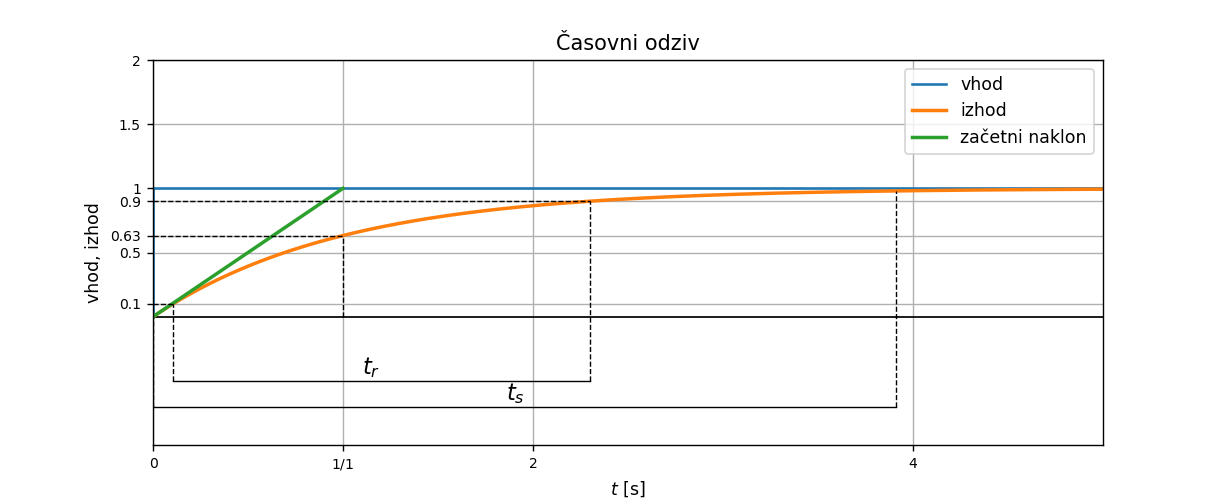

interactive(children=(IntSlider(value=1, description='k', max=5, min=1), Output()), _dom_classes=('widget-inte…

In [3]:
# set up plot
fig, ax = plt.subplots(figsize=[9.8,4],num='Sistem prvega reda')
ax.set_ylim([-1, 2])
ax.set_xlim([0, 5])
ax.grid(True)
ax.set_title ('Časovni odziv')
ax.set_xlabel('$t$ [s]')
ax.set_ylabel('vhod, izhod')
xaxis = ax.axhline(y=0,color='k',lw=1)

response, = ax.plot([], [])
slope, = ax.plot([], [])
x1a, = ax.plot([], [])
y1a, = ax.plot([], [])
tr11, = ax.plot([], [])
trv1, = ax.plot([], [])
trv2, = ax.plot([], [])
trh1, = ax.plot([], [])
trh2, = ax.plot([], [])
ts11, = ax.plot([], [])
ts1, = ax.plot([], [])
ts2, = ax.plot([], [])
texttr=ax.text(0,0,'')
textts=ax.text(0,0,'')

ax.step([0,5],[0,1],color='C0',label='vhod')

# generate x values
t = np.linspace(0, 2 * np.pi, 10000)
  
def response_func(t, k):
    """"Return response function"""
    return 1-np.exp(-k*t)

@widgets.interact(k=(1, 5, 1))


def update(k=1):
    """Remove old lines from plot and plot new one"""
    global response,slope,x1a,y1a,tr11,trv1,trv2,trh1,trh2,ts11,ts1,ts2,texttr,textts
    ax.lines.remove(response)
    ax.lines.remove(slope)
    ax.lines.remove(x1a)
    ax.lines.remove(y1a)
    ax.lines.remove(tr11)
    ax.lines.remove(trv1)
    ax.lines.remove(trv2)
    ax.lines.remove(trh1)
    ax.lines.remove(trh2)
    ax.lines.remove(ts11)
    ax.lines.remove(ts1)
    ax.lines.remove(ts2)
    texttr.remove()
    textts.remove()
    response, = ax.plot(t, response_func(t,k), color='C1',lw=2)
    response.set_label('izhod')
    slope, = ax.plot([0,1/k], [0,1], color='C2',lw=2)
    slope.set_label('začetni naklon')
    x1a, = ax.plot([1/k,1/k],[0,1-np.exp(-1)],'--',color='k',lw=.8)
    y1a, = ax.plot([0,1/k],[1-np.exp(-1),1-np.exp(-1)],'--',color='k',lw=.8)
# rise time
    tr11, = ax.plot([-np.log(0.9)/k,-np.log(0.1)/k],[-0.5,-0.5],color='k',lw=.8)
    trv1, = ax.plot([-np.log(0.9)/k,-np.log(0.9)/k],[-0.5,0.1],'--',color='k',lw=.8)
    trv2, = ax.plot([-np.log(0.1)/k,-np.log(0.1)/k],[-0.5,0.9],'--',color='k',lw=.8)
    trh1, = ax.plot([0,-np.log(0.9)/k],[0.1,0.1],'--',color='k',lw=.8)
    trh2, = ax.plot([0,-np.log(0.1)/k],[0.9,0.9],'--',color='k',lw=.8)
# settling time
    ts11, = ax.plot([0,-np.log(0.02)/k],[-0.7,-0.7],color='k',lw=.8)
    ts1, = ax.plot([0,0],[-0.7,0],'--',color='k',lw=.8)
    ts2, = ax.plot([-np.log(0.02)/k,-np.log(0.02)/k],[-0.7,0.98],'--',color='k',lw=.8)
    ax.legend()
    texttr=ax.text((-np.log(0.1)/k-(-np.log(0.9)/k))/2,-0.45, '$t_r$',fontsize=13)
    textts=ax.text((-np.log(0.02)/k)/2-0.1,-0.65, '$t_s$',fontsize=13)

    plt.xticks([0,1/k,2,4], [0,'${1}/{%s}$'%k,2,4],fontsize=8)
    plt.yticks([0.1,0.5,0.63,0.9,1,1.5,2], [0.1,0.5,0.63,0.9,1,1.5,2],fontsize=8)
    
    num1=[k]
    den1=[1,k]
    display(Markdown('Prenosna funkcija sistema $G(s)$ je enaka:'))
    tf_sys1=c.TransferFunction(num1,den1)
    s=sym.Symbol('s')
    eq=(k/(s+k))
    display(eq)

## Sistemi drugega reda

### Uvod

Pri sistemih prvega reda, predstavljenimi na začetku tega interaktivnega primera, je vrednost parametra $k$ vplivala le na hitrost odziva. Pri sistemih drugega reda pa spremembe analognih parametrov vplivajo na obliko samega odziva. Možni so naslednji odzivi:
- *nadkritično dušen* odziv,
- *podkritično dušen* odziv,
- *nedušen* odziv,
- *kritično dušen* odziv.

### Kako upravljati s tem interaktivnim primerom?

Z uporabo drsnikov spreminjaj vrednosti parametrov $a$ and $b$, ki sta del prenosne funkcije sistemov drugega reda $G(s)=\frac{k}{s+k}$, in opazuj odziv sistema na enotsko skočno funkcijo ter spremembe v diagramu lege ničel in polov.

<!-- 
In contrast to the first-order systems presented above, in which the parameter $k$ only affected the speed of the response, changes of the analogue parameters in the second order systems may affect the actual form of the response. The following four responses are possible in these systems:
- *overdamped* response,
- *underdamped* response,
- *undapmed* response, and
- *critically damped* response.

### How to use this notebook?

Move the slider to define the values of $a$ and $b$ in the transfer function of the second-order system of the form $G(s)=\frac{b}{s^2+as+b}$ and observe the pole-zero plot and the unit step time response of the defined system. -->

<IPython.core.display.Javascript object>


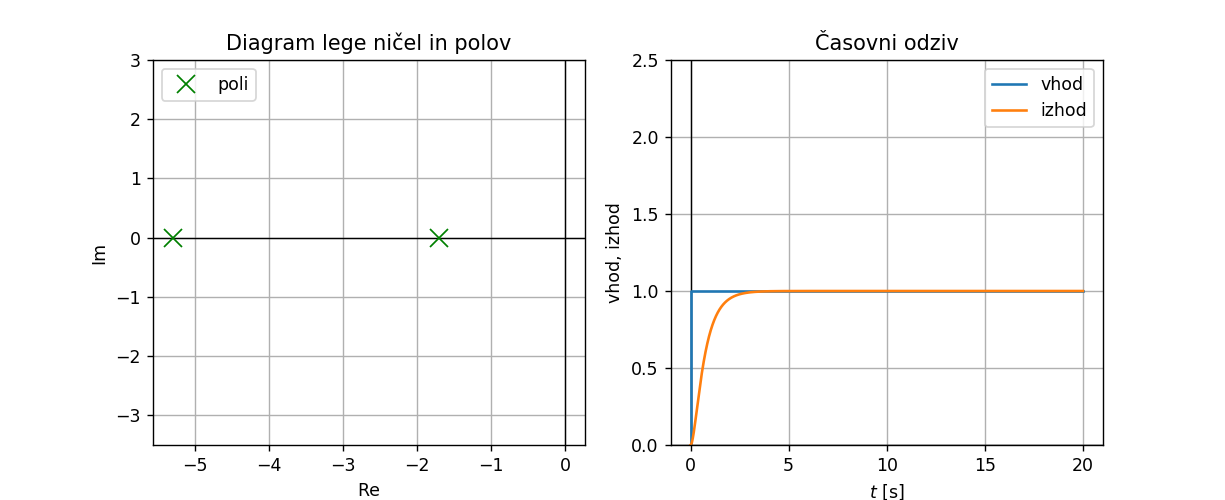

interactive(children=(IntSlider(value=7, description='a', max=10), IntSlider(value=9, description='b', max=10,…

In [4]:
# set up plot
fig1, ax1 = plt.subplots(1,2,figsize=[9.8,4],num='Sistem drugega reda')
ax1[0].set_ylim([-3.5, 3])
ax1[1].set_ylim([0, 2.5])
# ax1.set_xlim([0, 5])
ax1[0].grid(True)
ax1[1].grid(True)
ax1[0].axhline(y=0,color='k',lw=.8)
ax1[1].axhline(y=0,color='k',lw=.8)
ax1[0].axvline(x=0,color='k',lw=.8)
ax1[1].axvline(x=0,color='k',lw=.8)
ax1[0].set_xlabel('Re')
ax1[0].set_ylabel('Im')
ax1[1].set_xlabel('$t$ [s]')
ax1[1].set_ylabel('vhod, izhod')
ax1[0].set_title('Diagram lege ničel in polov')
ax1[1].set_title('Časovni odziv')

t = np.linspace(0, 20, 10000)

textGs = ax1[0].text(0,0,'')

ax1[1].step([0,20],[0,1],color='C0',label='vhod')

plotzero, = ax1[0].plot([], [])
response2, = ax1[1].plot([], [])

def response_func2(t, a, b):
    num_sys=np.array([b])
    den_sys=np.array([1,a,b])
    tf_sys=c.TransferFunction(num_sys,den_sys)
    poles_sys,zeros_sys=c.pzmap(tf_sys, Plot=False)
    T, yout = c.step_response(tf_sys,t)
    return T, yout, poles_sys, tf_sys
 
@widgets.interact(a=(0, 10, 1),b=(1,10,1))

def update(a=7,b=9):
    """ Update plots """
    global response2, plotzero, textGs
    ax1[0].lines.remove(plotzero)
    ax1[1].lines.remove(response2)
#     textGs.remove()
    T, yout, poles_sys, tf_sys = response_func2(t, a, b)
    plotzero, = ax1[0].plot(np.real(poles_sys), np.imag(poles_sys), 'xg', markersize=10, label = 'poli')
#     textGs = ax1[0].text(-7,1,tf_sys)
    response2, = ax1[1].plot(T,yout,color='C1',label='izhod')
    s=sym.Symbol('s')
    eq=b/(s**2+a*s+b)
    coeff = [1,a,b]
    rootsdenom=np.roots(coeff)
    eq2=b/((s-rootsdenom[0])*(s-rootsdenom[1]))
    display(Markdown('Prenosna funkcija sistema $G(s)$ je enaka:'))
    display(eq),display(Markdown('oz.')),display(eq2)

    if np.imag(poles_sys)[0] == 0 and np.imag(poles_sys)[1] == 0 and np.real(poles_sys)[0] < 0 and np.real(poles_sys)[1] < 0 and np.real(poles_sys)[0]!=np.real(poles_sys)[1]:
        display(Markdown('Sistem je **nadkritično dušen**, saj imajo poli zgolj negativen realno komponento.'))
    elif math.isclose(0, np.imag(poles_sys)[0], abs_tol=10**-6) and math.isclose(0, np.imag(poles_sys)[1], abs_tol=10**-6) and np.real(poles_sys)[1] < 0 and np.real(poles_sys)[0]==np.real(poles_sys)[1]:
        display(Markdown('Sistem je **kritično dušen**, saj ima sistem zgolj dvojni pol z negativno realno komponento.'))
    elif np.real(poles_sys)[0] == 0 and np.real(poles_sys)[1] == 0:
        display(Markdown('Sistem je **nedušen**, ker imajo poli zgolj imaginarno komponento.'))
    elif np.imag(poles_sys)[0] != 0 and np.imag(poles_sys)[1] != 0 and np.real(poles_sys)[0] != 0 and np.real(poles_sys)[1] != 0:
        display(Markdown('Sistem je **podkritično dušen**, ker imajo poli negativno realno komponennto in neničelno kompleksno komponento.'))
    ax1[0].legend()
    ax1[1].legend()